In [3]:
import numpy as np
from random import choices
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
class Dataframe_Scenario:

  """

  This class is based on the different scenarios, as explained in the paper.
  truncnorm: creates a normal distribution according to the inserted stats.
  df_creation: creates the fitting dataframe to each scenario by generating 1000 different samples.
  sample_hist: plots random samples of n. samples in the dataframe created by df_creation.
  sum_alphas_to_df: adding alphas and sum to the dataframe.
  plot_df: plots the data into a three-plot figure.

  """
  
  def __init__(self,scenario):
    self.scenario = scenario

  def truncnorm(self,n,normal_dist):
    lower,upper,mu,sigma = normal_dist
    truncnorm = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    return np.rint(truncnorm.rvs(n)) 

  def df_creation(self):

    df = pd.DataFrame(columns=['sample_no','seniority','grade','priority'])

    normal_dist = {'mu_bigger':(40,220,130,30), 'mu_smaller': (40,160,100,30), 'mu_sigma_bigger':(40,220,130,60)}

    for i in range(0,1000):

      if self.scenario == 1:
        df0 = pd.DataFrame(self.truncnorm(1900,normal_dist['mu_bigger']),columns=['grade'])
      
      elif self.scenario ==2:
        df0 = pd.DataFrame(self.truncnorm(1900,normal_dist['mu_smaller']),columns=['grade'])

      elif self.scenario ==3:
        df0 = pd.DataFrame(self.truncnorm(1900,normal_dist['mu_sigma_bigger']),columns=['grade'])

      df0['seniority']=1
      df0['priority'] = 6500
      df0['sample_no'] = i

      df1 = pd.DataFrame(self.truncnorm(7500,normal_dist['mu_smaller']),columns=['grade'])
      df1['seniority']=0
      df1['priority'] = df1['grade'].apply(lambda x: 3000 if x > 130 else 2000)
      df1['sample_no'] = i
  
      ## concatenate the dataframes
      df = pd.concat([df,df0,df1])

      df.reset_index(inplace=True,drop=True)

    return df

  
  def sample_hist(self,df, n_hists):
    fig = plt.figure(figsize=(25,25))
    fig.suptitle(f"Sampling of {n_hists} samples in the data")

    for i,sample_no in enumerate(df['sample_no'].sample(n_hists)):
        plt.subplot(n_hists,2,i+1)
        sns.histplot(df.loc[ (df['seniority']==0)&(df['sample_no']==sample_no) ,'grade'],color='red',kde=True)
        sns.histplot(df.loc[ (df['seniority']==1)&(df['sample_no']==sample_no) ,'grade'],color='green',kde=True)
        title = f'Dataset sample no.{sample_no}'
        plt.title(title)

    
        
    fig.legend(['grades of seniority=0','grades of seniority=1'])

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

  def sum_alphas_to_df(self,df):

    alphas = [1,.5,.1,.05,.01,.005,0]
    alphas_to_df = alphas*len(df.index)
    df = df.loc[df.index.repeat(len(alphas))]
    df['alpha'] = alphas_to_df

    df['sum'] = df.apply(lambda x: x['grade'] + (x['alpha']*x['priority']),axis=1)

    df.reset_index(inplace=True,drop=True)

    return df

  def plot_df(self,df):
    index_nums = df.groupby(by=['sample_no','alpha'])['sum'].nlargest(2500).reset_index().rename(columns={'level_2':'old_index'})['old_index']

    df= df.loc[df.index[index_nums]].reset_index(drop=True)

    df0=df.groupby(by=['sample_no','alpha']).mean().reset_index()


    df_seniority=df.groupby(by=['sample_no','alpha','seniority']).mean().reset_index()

    df1 = df_seniority[df_seniority['seniority']==1]

    df2 = df_seniority[df_seniority['seniority']==0]


    fig, axes = plt.subplots(1,3,figsize=(20, 5), sharey=True)

    plt.suptitle(f'Scenario {self.scenario}')
    
    sns.scatterplot(x=df0['alpha'],y=df0['grade'], color='g',label='all samples',ax=axes[0])

    sns.scatterplot(x=df1['alpha'],y=df1['grade'], color='r',label='seniority=1',ax=axes[1])

    sns.scatterplot(x=df2['alpha'],y=df2['grade'], color='b',label='seniority=0',ax=axes[2])
    

    for ax in axes:
      ax.set_xlabel('Alpha Rates')
      ax.set_ylabel('Average Score (grade)')
      ax.set_ylim([100,180])
      ax.set_title(f'Figure {list(axes).index(ax)+1}')
      
    print( f'Figure {1}: alpha = 0, Mean: ',round(df0[df0['alpha']==0]['grade'].mean()),'| alpha = 1, Mean: ',round(df0[df0['alpha']==1]['grade'].mean()))
    print( f'Figure {2}: alpha = 0, Mean: ',round(df1[df1['alpha']==0]['grade'].mean()),'| alpha = 1, Mean: ',round(df1[df1['alpha']==1]['grade'].mean()))
    print( f'Figure {3}: alpha = 0, Mean: ',round(df2[df2['alpha']==0]['grade'].mean()),'| alpha = 1, Mean: ',round(df2[df2['alpha']==1]['grade'].mean()))


    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
                        
    plt.legend()

    plt.show()



#Scenario 1:

In [3]:
df = Dataframe_Scenario(1).df_creation()

df

,sample_no,seniority,grade,priority
0,0,1,186.0,6500
1,0,1,150.0,6500
2,0,1,150.0,6500
3,0,1,142.0,6500
4,0,1,152.0,6500
...,...,...,...,...
9399995,999,0,112.0,2000
9399996,999,0,88.0,2000
9399997,999,0,89.0,2000
9399998,999,0,108.0,2000


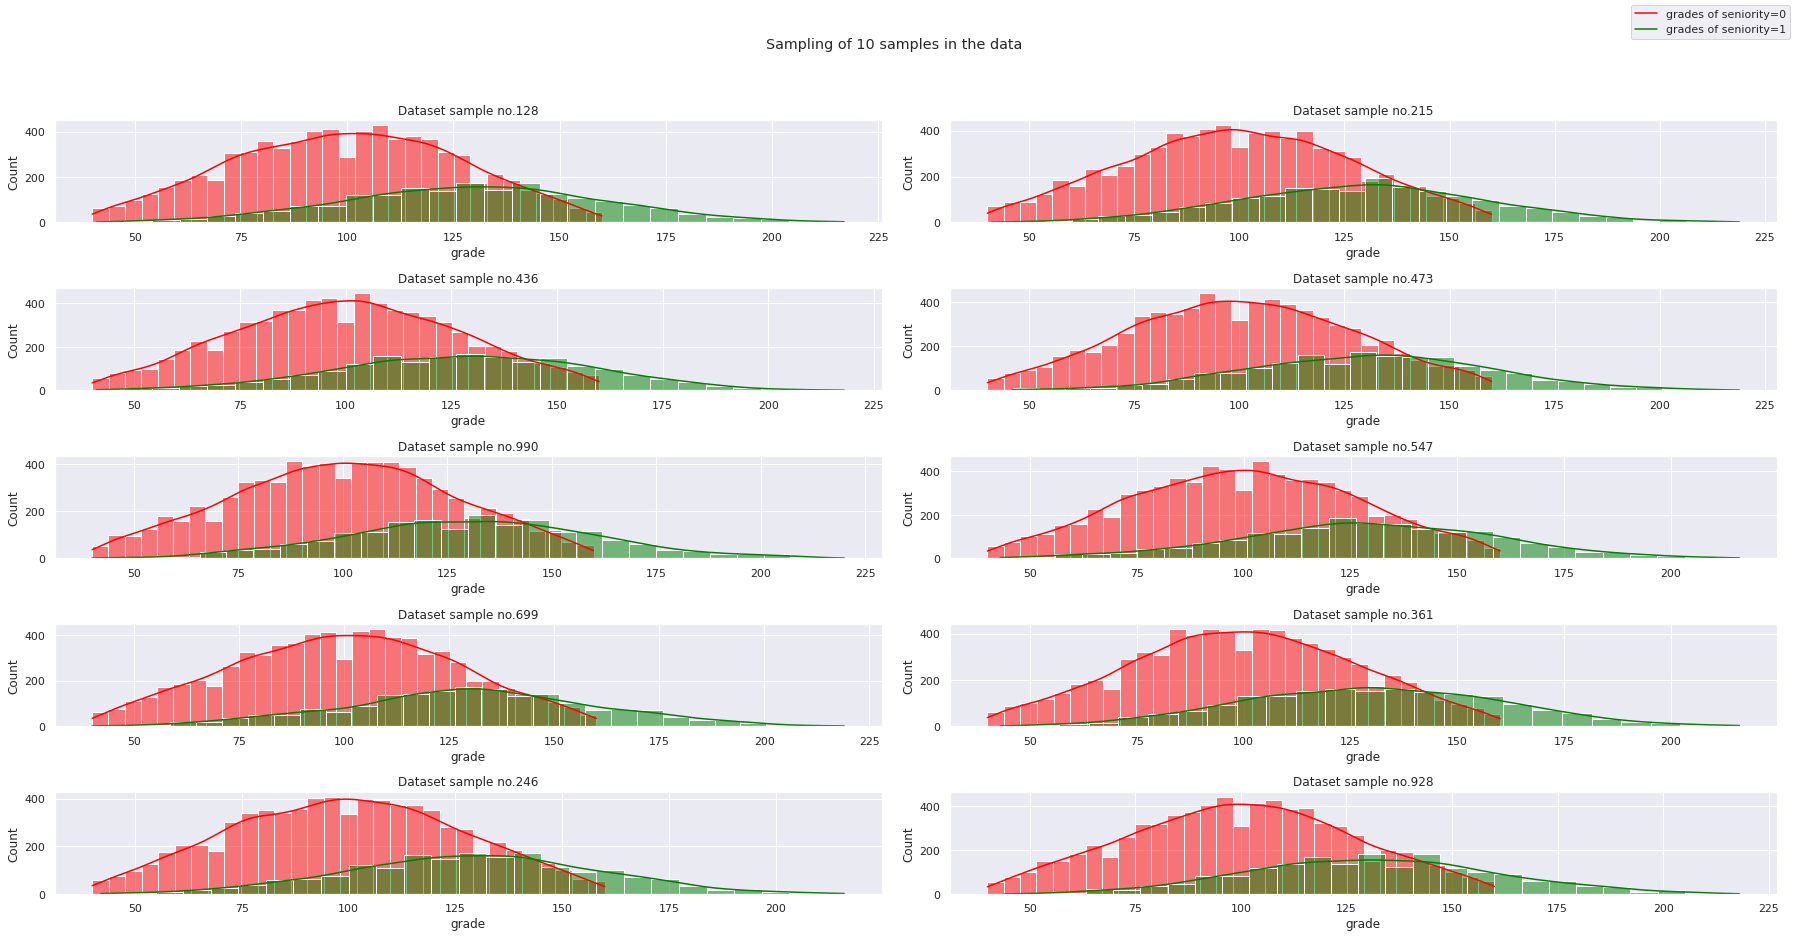

In [4]:
Dataframe_Scenario(1).sample_hist(df,10)

In [5]:
df = Dataframe_Scenario(1).sum_alphas_to_df(df)

df

,sample_no,seniority,grade,priority,alpha,sum
0,0,1,186.0,6500,1.000,6686.0
1,0,1,186.0,6500,0.500,3436.0
2,0,1,186.0,6500,0.100,836.0
3,0,1,186.0,6500,0.050,511.0
4,0,1,186.0,6500,0.010,251.0
...,...,...,...,...,...,...
65799995,999,0,91.0,2000,0.100,291.0
65799996,999,0,91.0,2000,0.050,191.0
65799997,999,0,91.0,2000,0.010,111.0
65799998,999,0,91.0,2000,0.005,101.0


Figure 1: alpha = 0, Mean:  143 | alpha = 1, Mean:  134
Figure 2: alpha = 0, Mean:  150 | alpha = 1, Mean:  130
Figure 3: alpha = 0, Mean:  138 | alpha = 1, Mean:  147


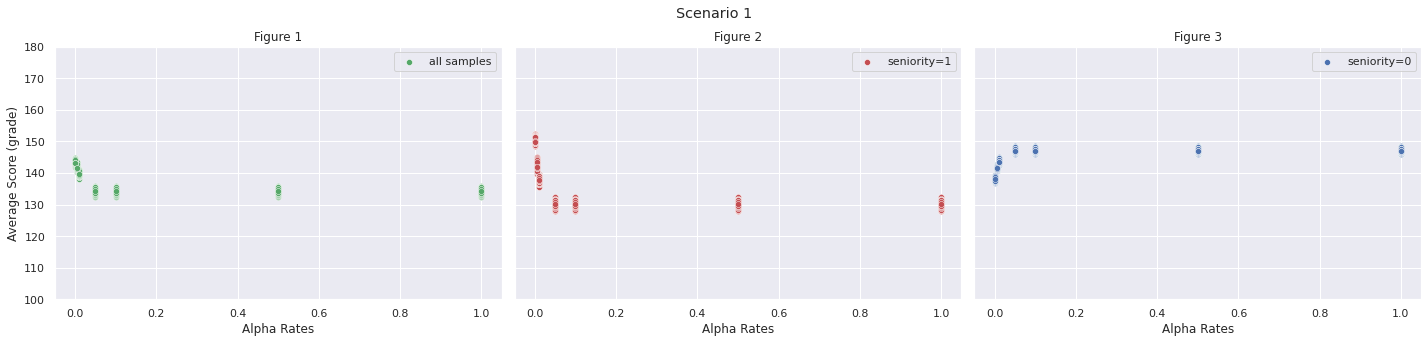

In [6]:
Dataframe_Scenario(1).plot_df(df)

#Scenario 2:

In [7]:
df = Dataframe_Scenario(2).df_creation()

df

,sample_no,seniority,grade,priority
0,0,1,125.0,6500
1,0,1,127.0,6500
2,0,1,126.0,6500
3,0,1,76.0,6500
4,0,1,127.0,6500
...,...,...,...,...
9399995,999,0,118.0,2000
9399996,999,0,89.0,2000
9399997,999,0,130.0,2000
9399998,999,0,100.0,2000


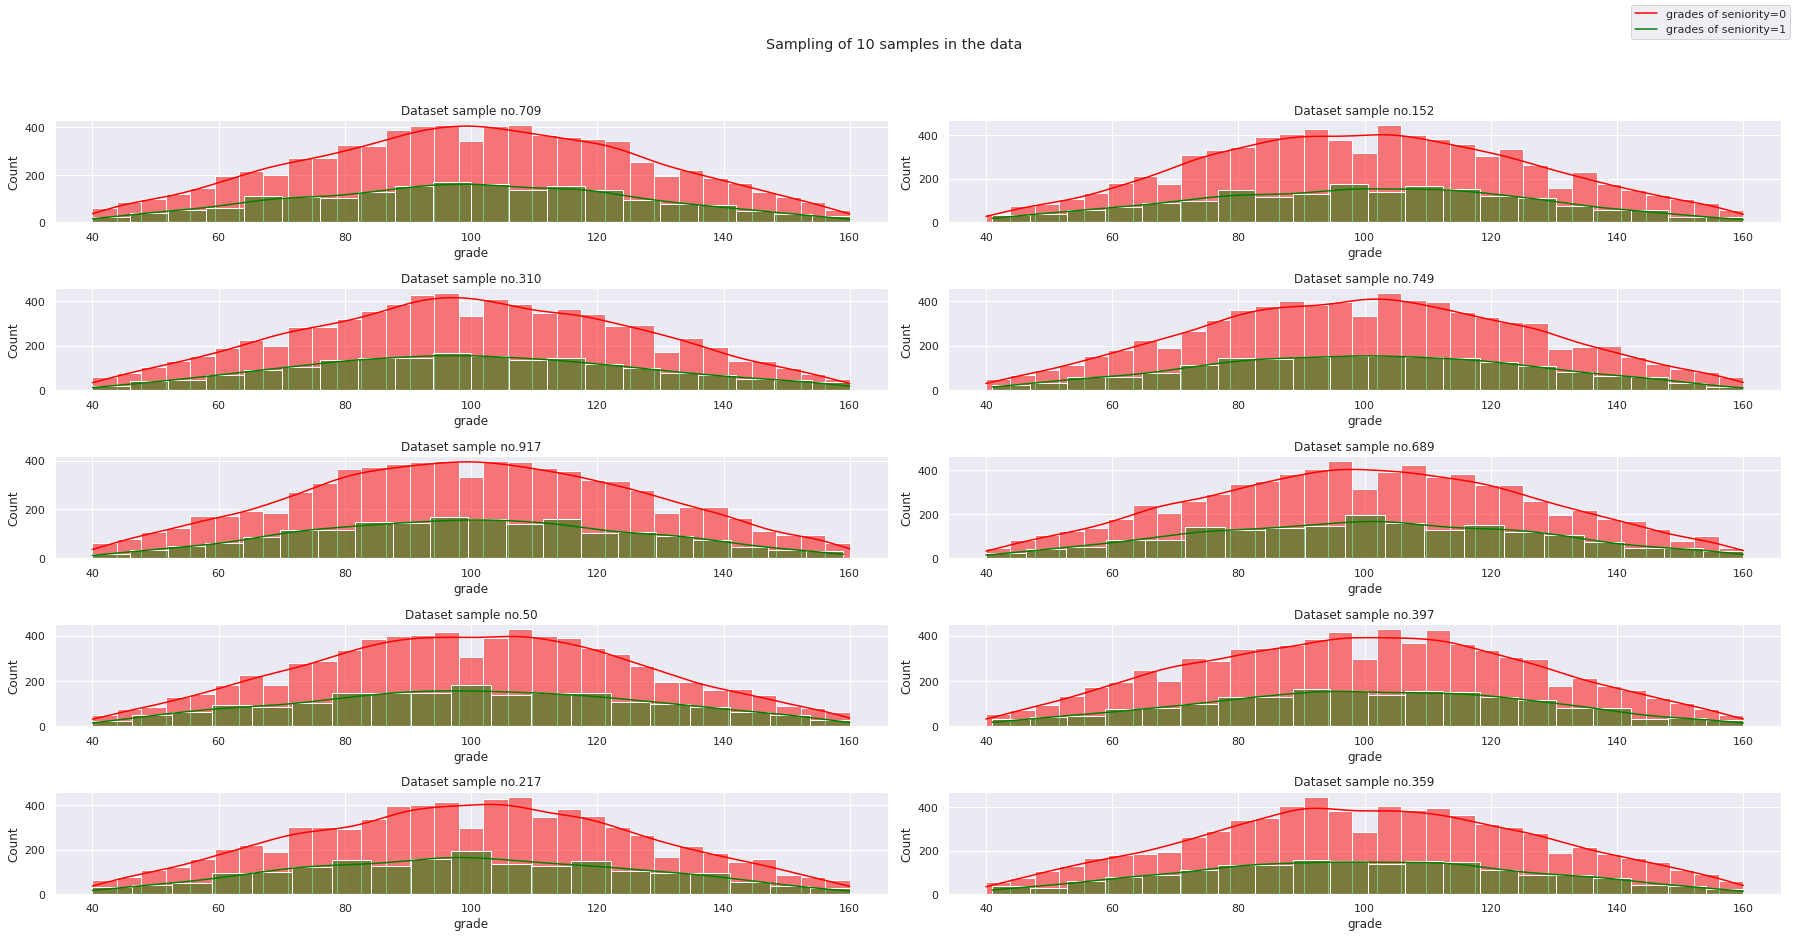

In [8]:
Dataframe_Scenario(2).sample_hist(df,10)

In [9]:
df = Dataframe_Scenario(2).sum_alphas_to_df(df)

df

,sample_no,seniority,grade,priority,alpha,sum
0,0,1,125.0,6500,1.000,6625.0
1,0,1,125.0,6500,0.500,3375.0
2,0,1,125.0,6500,0.100,775.0
3,0,1,125.0,6500,0.050,450.0
4,0,1,125.0,6500,0.010,190.0
...,...,...,...,...,...,...
65799995,999,0,138.0,3000,0.100,438.0
65799996,999,0,138.0,3000,0.050,288.0
65799997,999,0,138.0,3000,0.010,168.0
65799998,999,0,138.0,3000,0.005,153.0


Figure 1: alpha = 0, Mean:  133 | alpha = 1, Mean:  111
Figure 2: alpha = 0, Mean:  133 | alpha = 1, Mean:  100
Figure 3: alpha = 0, Mean:  133 | alpha = 1, Mean:  147


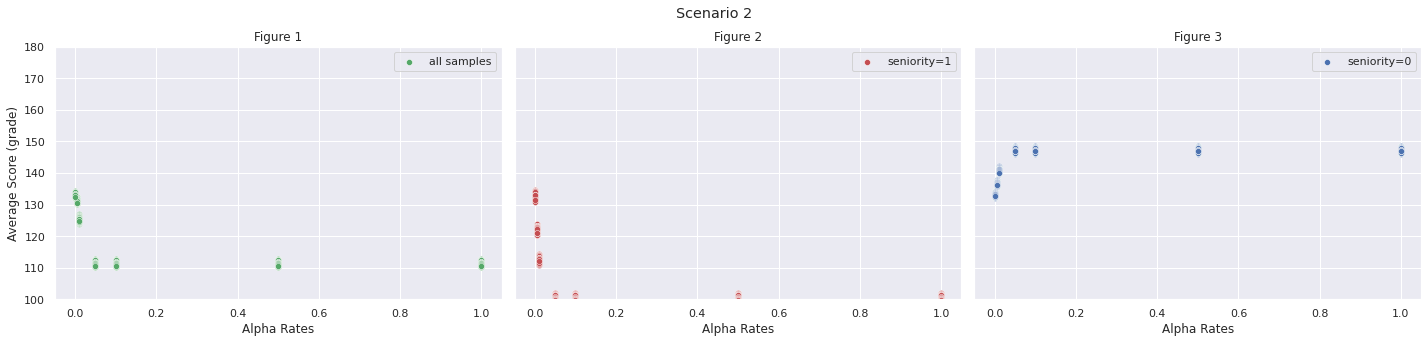

In [10]:
Dataframe_Scenario(2).plot_df(df)

#Scenario 3:

In [5]:
df = Dataframe_Scenario(3).df_creation()

df

,sample_no,seniority,grade,priority
0,0,1,198.0,6500
1,0,1,135.0,6500
2,0,1,59.0,6500
3,0,1,65.0,6500
4,0,1,128.0,6500
...,...,...,...,...
9399995,999,0,110.0,2000
9399996,999,0,94.0,2000
9399997,999,0,50.0,2000
9399998,999,0,105.0,2000


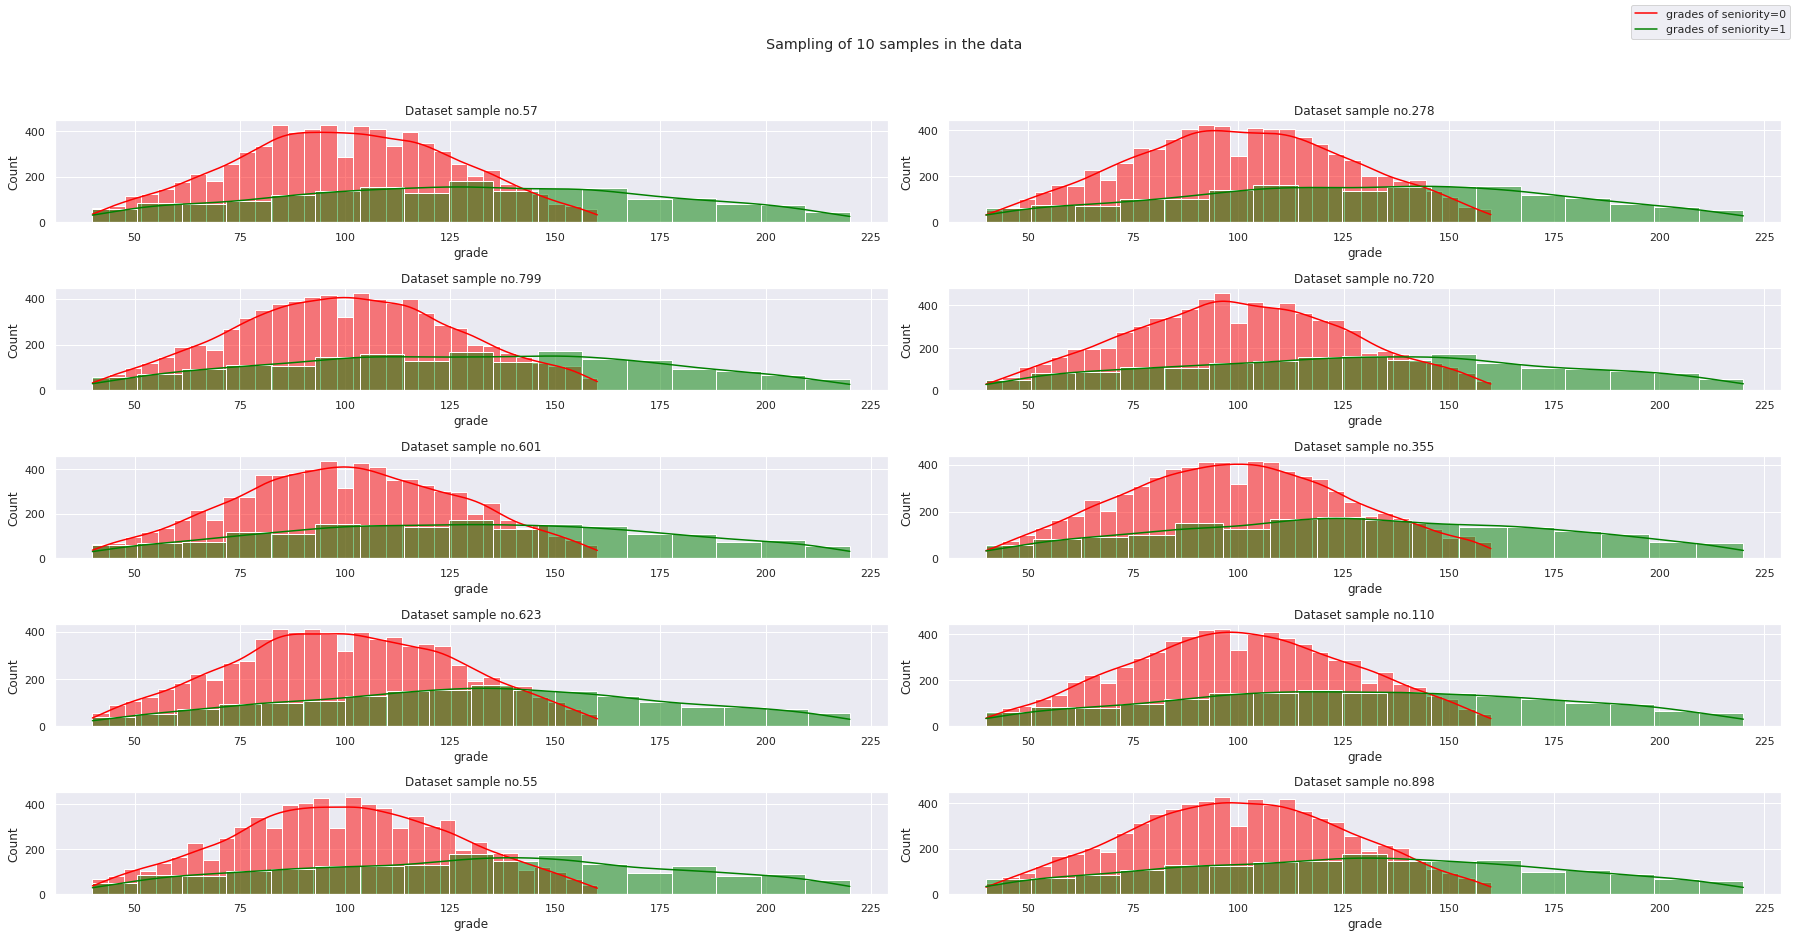

In [6]:
Dataframe_Scenario(3).sample_hist(df,10)

In [7]:
df = Dataframe_Scenario(3).sum_alphas_to_df(df)

df

,sample_no,seniority,grade,priority,alpha,sum
0,0,1,198.0,6500,1.000,6698.0
1,0,1,198.0,6500,0.500,3448.0
2,0,1,198.0,6500,0.100,848.0
3,0,1,198.0,6500,0.050,523.0
4,0,1,198.0,6500,0.010,263.0
...,...,...,...,...,...,...
65799995,999,0,156.0,3000,0.100,456.0
65799996,999,0,156.0,3000,0.050,306.0
65799997,999,0,156.0,3000,0.010,186.0
65799998,999,0,156.0,3000,0.005,171.0


Figure 1: alpha = 0, Mean:  149 | alpha = 1, Mean:  134
Figure 2: alpha = 0, Mean:  164 | alpha = 1, Mean:  130
Figure 3: alpha = 0, Mean:  138 | alpha = 1, Mean:  147


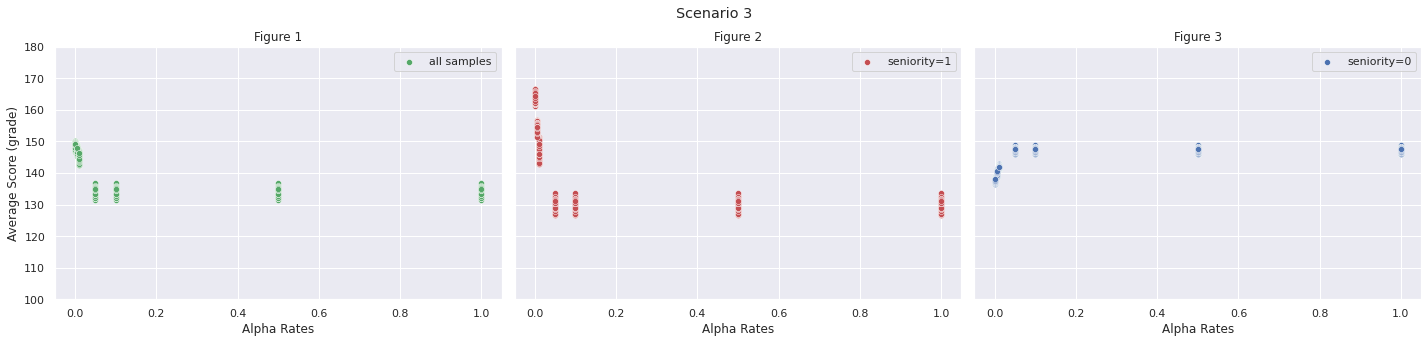

In [8]:
Dataframe_Scenario(3).plot_df(df)